In [4]:
import pandas as pd
from IPython.display import display

In [30]:
# Start writing code here...

data = pd.read_csv('red-wine.csv')

##split
train = data.sample(frac = 0.7,random_state = 0)
valid = data.drop(train.index)

## scaling 
max_ = train.max(axis = 0)
min_ = train.min(axis = 0)

train = (train - min_) / (max_ - min_)
valid = (valid - min_) / (max_ - min_)

##train and test
X_train = train.drop('quality',axis = 1)
X_test = valid.drop('quality',axis = 1)

y_train = train.quality
y_test  = valid.quality

##model
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([Dense(512,activation='relu',input_shape = [11]),
Dense(1024,activation= 'relu'),
Dense(512,activation='relu'),
Dense(1)])

model.compile(loss= 'mse',optimizer = 'adam')
red_wine = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size = 256,epochs = 10)









Epoch 1/10
5/5 [==============================] - 0s 50ms/step - loss: 0.1484 - val_loss: 0.0399
Epoch 2/10
5/5 [==============================] - 0s 33ms/step - loss: 0.0408 - val_loss: 0.0263
Epoch 3/10
5/5 [==============================] - 0s 35ms/step - loss: 0.0266 - val_loss: 0.0233
Epoch 4/10
5/5 [==============================] - 0s 35ms/step - loss: 0.0232 - val_loss: 0.0228
Epoch 5/10
5/5 [==============================] - 0s 39ms/step - loss: 0.0228 - val_loss: 0.0193
Epoch 6/10
5/5 [==============================] - 0s 35ms/step - loss: 0.0214 - val_loss: 0.0197
Epoch 7/10
5/5 [==============================] - 0s 34ms/step - loss: 0.0207 - val_loss: 0.0180
Epoch 8/10
5/5 [==============================] - 0s 38ms/step - loss: 0.0186 - val_loss: 0.0187
Epoch 9/10
5/5 [==============================] - 0s 34ms/step - loss: 0.0185 - val_loss: 0.0178
Epoch 10/10
5/5 [==============================] - 0s 35ms/step - loss: 0.0187 - val_loss: 0.0176


In [32]:
final_data = pd.DataFrame(red_wine.history)
final_data

,loss,val_loss
0,0.110479,0.039908
1,0.039312,0.026302
2,0.026938,0.023311
3,0.023708,0.022822
4,0.022315,0.019276
5,0.021051,0.019713
6,0.020538,0.017993
7,0.019589,0.018661
8,0.018966,0.017848
9,0.019096,0.017629


Text(0, 0.5, 'loss of each epochs')

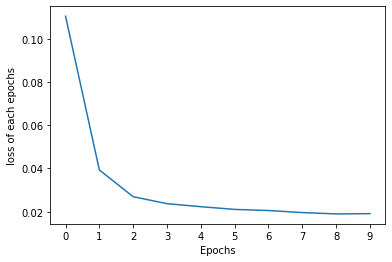

In [38]:
import matplotlib.pyplot as plt
epoch = 10
final_data.loss.plot()
plt.xticks(range(epoch))
plt.xlabel('Epochs')
plt.ylabel('loss of each epochs')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88190736-eb57-4922-a018-2ff5a44a7537' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>